In [ ]:
import numpy as np
import pandas as pd
import difflib as dl
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
from google.colab import files # for uploading files into colab
uploaded = files.upload()

Saving data.csv to data.csv


Data preparation

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head(10)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0
6,9780006353287,0006353282,An Autobiography,NaN,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0


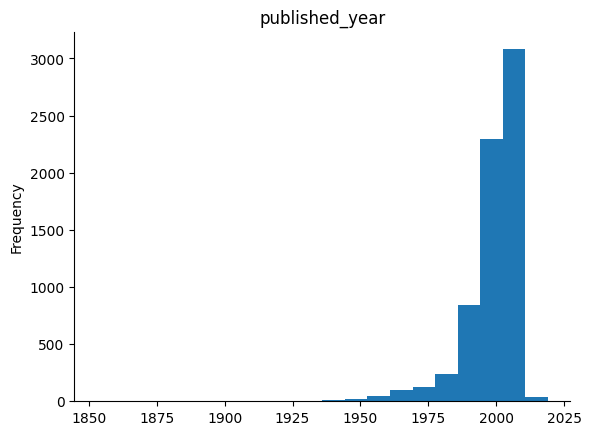

In [ ]:
import matplotlib.pyplot as plt
df['published_year'].plot(kind='hist', bins=20, title='published_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [ ]:
selected_features = ['title', 'authors', 'categories', 'published_year']
print(selected_features)

['title', 'authors', 'categories', 'published_year']


In [ ]:
for feature in selected_features:
  df[feature] = df[feature].fillna('') # replacing the null with null string

In [ ]:
combined_features = df['title'] + ' ' + df['categories'] + ' ' + df['authors'] + ' ' + f"df{['published_year']}"
combined_features

,0
0,Gilead Fiction Marilynne Robinson df['publishe...
1,Spider's Web Detective and mystery stories Cha...
2,The One Tree American fiction Stephen R. Donal...
3,Rage of angels Fiction Sidney Sheldon df['publ...
4,The Four Loves Christian life Clive Staples Le...
...,...
6805,I Am that Philosophy Sri Nisargadatta Maharaj;...
6806,Secrets Of The Heart Mysticism Khalil Gibran d...
6807,Fahrenheit 451 Book burning Ray Bradbury df['p...
6808,The Berlin Phenomenology History Georg Wilhelm...


building recommendation system

In [ ]:
# converting the text data to feature vectors
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
print(feature_vectors)

  (0, 3872)	0.6188066849909517
  (0, 3412)	0.1176550569996695
  (0, 6002)	0.6188066849909517
  (0, 8023)	0.4594917500642743
  (0, 2589)	0.06775393865412317
  (0, 7617)	0.06775393865412317
  (1, 2589)	0.051167820500613505
  (1, 7617)	0.051167820500613505
  (1, 8901)	0.3903628666376937
  (1, 10108)	0.37154719109461387
  (1, 2576)	0.33228841716239016
  (1, 440)	0.17445985377828707
  (1, 6614)	0.3103376470236748
  (1, 9053)	0.2319431882838355
  (1, 1719)	0.2719792098774296
  (1, 6990)	0.3800949845125531
  (1, 257)	0.31403813765386673
  (1, 1812)	0.3103376470236748
  (2, 3412)	0.11775089323680621
  (2, 2589)	0.0678091278036369
  (2, 7617)	0.0678091278036369
  (2, 9392)	0.13103090660884226
  (2, 6941)	0.417889521483475
  (2, 9635)	0.5037132543494611
  (2, 401)	0.35008870382526075
  :	:
  (6807, 1209)	0.29733123338555945
  (6807, 1431)	0.45987652885343594
  (6807, 3302)	0.45987652885343594
  (6807, 127)	0.45987652885343594
  (6808, 2589)	0.053314172608665444
  (6808, 7617)	0.05331417260866544

In [ ]:
similarity = cosine_similarity(feature_vectors, feature_vectors) # getting the similarity scores using cosine similarity
print(similarity)

[[1.         0.00693364 0.02304266 ... 0.00738352 0.00722449 0.00654182]
 [0.00693364 1.         0.00693929 ... 0.00557604 0.00545594 0.05569791]
 [0.02304266 0.00693929 1.         ... 0.00738953 0.02072939 0.00654715]
 ...
 [0.00738352 0.00557604 0.00738953 ... 1.         0.00580994 0.00526093]
 [0.00722449 0.00545594 0.02072939 ... 0.00580994 1.         0.00514762]
 [0.00654182 0.05569791 0.00654715 ... 0.00526093 0.00514762 1.        ]]


recommendations testing

In [ ]:
book_name = input('Enter your favourite book name: ')
list_of_all_titles = df['title'].tolist()
find_close_match = dl.get_close_matches(book_name, list_of_all_titles)
close_match = find_close_match[0]
index_of_the_book = df[df.title == close_match].index[0]
similarity_score = list(enumerate(similarity[index_of_the_book]))
sorted_similar_books = sorted(similarity_score, key = lambda x:x[1], reverse=True)
print('Books suggested for you : \n')

i = 1
for book in sorted_similar_books:
  index = book[0]
  title_from_index = df[df.index == index]['title'].values[0]
  if (i<11):
    print(i, '.', title_from_index)
    i += 1

Enter your favourite book name: The One Tree
Books suggested for you : 

1 . The One Tree
2 . Forbidden Knowledge
3 . Reave the Just and Other Tales
4 . A Dark and Hungry God Arises
5 . Tree
6 . The Gap Into Madness
7 . One More for the Road
8 . Silver on the Tree
9 . On Writing
10 . The Tin Can Tree
